# The Heapsort

In [1]:
# Imports
import random as rand
import networkx as nx
import matplotlib.pyplot as plt
import math
import copy

## Definition of a rooted binary tree
To define a rooted binary tree, it is important to understand what a tree is, so we will begin with defining a tree as regards graph theory:

A tree is an undirected graph in which there is always one path between any of its points:

<B>Undirected:</B> In this context, undirected means that each connection between vertices is bidirectional (i.e. if p<sup>1</sup> is connected to p<sup>2</sup> then p<sup>2</sup> is also connected to p<sup>1</sup>)

<B>Path:</B> A path is the sequence of connections between vertices, in the case of a tree, there must be one and only valid path between vertices on a graph. (E.g. Graph 1 below is a valid example of a tree, as there is only one possible path between any of the vertices. Graph 2 is not as each of the vertices have multiple paths to one another)

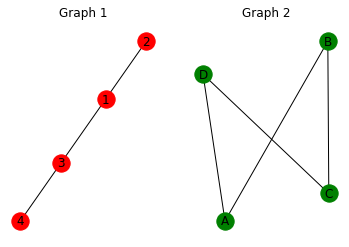

In [2]:
# Graphs to be used as visual aid for definition of paths
example1 = nx.Graph()
example1Connections = [('1', '2'), ('1', '3'), ('3', '4')]
example1.add_edges_from(example1Connections)

example2 = nx.Graph()
example2Connections = [('A', 'B'), ('A', 'D'), ('B', 'C'), ('C', 'D')]
example2.add_edges_from(example2Connections)

plt.subplot(121)
plt.title('Graph 1')
nx.draw(example1, with_labels=True, node_color="red")

plt.subplot(122)
plt.title("Graph 2")
nx.draw(example2, with_labels=True, node_color="green")

plt.show()

### Now that the tree has been defined, it is time to define what a rooted tree means in this context: 

<b>Rooted Tree:</b> A rooted tree is a tree in which there is a particular vertex, typically called a root, which is used to define the position of the other vertices in the tree.

In rooted trees, the typically way of defining Vertices is that of parent vertices and child vertices:

<B>Parent Vertices:</B> A parent vertices is a vertices with associated child vertices, the amount of children a parent may possess is dependent upon the type of tree. It is worth noting that the root of a tree is the only vertex with no associated parent vertex.

<B>Child Vertices:</B> A child vertex is attached to and defined by it's parent vertex, while parental vertices may have many children dependent on the tree type, a child vertex may only ever have one parental vertex.

<B>Depth:</B> The depth of a rooted tree is the longest path between the root vertex and a child vertex, in furthering the parent-child metaphor, it could be thought of as the number of generations.


### Now that both the tree and the rooted tree have been defined, it is time to explain what the binary refers to in binary rooted tree:

<B>Binary Rooted Tree:</B> A binary rooted tree is a rooted tree in which every parental vertex can have a maximum of two children, for convenience these children are typically referred to as the left child and right child.

Graph 3 and 4 below are examples of binary rooted trees

[(0, 0, 1.0), (1, -1, 0.6666666666666667), (3, -1.5, 0.33333333333333337), (7, -1.75, 0.0), (8, -1.25, 0.0), (4, -0.5, 0.33333333333333337), (9, -0.75, 0.0), (10, -0.25, 0.0), (2, 1, 0.6666666666666667), (5, 0.5, 0.33333333333333337), (11, 0.25, 0.0), (12, 0.75, 0.0), (6, 1.5, 0.33333333333333337), (13, 1.25, 0.0), (14, 1.75, 0.0)]
[(0, 0, 1.0), (1, -1, 0.6666666666666667), (3, -1.5, 0.33333333333333337), (7, -1.75, 0.0), (8, -1.25, 0.0), (4, -0.5, 0.33333333333333337), (9, -0.75, 0.0), (10, -0.25, 0.0), (2, 1, 0.6666666666666667), (5, 0.5, 0.33333333333333337), (11, 0.25, 0.0), (12, 0.75, 0.0), (6, 1.5, 0.33333333333333337), (13, 1.25, 0.0), (14, 1.75, 0.0)]
[(0, 0, 1.0), (1, -1, 0.6666666666666667), (3, -1.5, 0.33333333333333337), (7, -1.75, 0.0), (8, -1.25, 0.0), (4, -0.5, 0.33333333333333337), (2, 1, 0.6666666666666667), (5, 0.5, 0.33333333333333337), (6, 1.5, 0.33333333333333337)]
[(0, 0, 1.0), (1, -1, 0.6666666666666667), (3, -1.5, 0.33333333333333337), (7, -1.75, 0.0), (8, -1.25

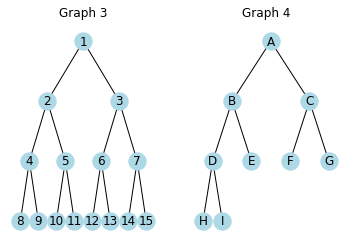

In [3]:
example3 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
example4 = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

def calc_position(listToDraw, coOrdsList, i, xPos, xOffset, treeDepth):
    leftChild = 2 * i + 1
    rightChild = 2 * i + 2
    
    x = xPos
    y = 1 - (math.floor(math.log(i + 1, 2)) / treeDepth)
    
    coOrd = (i, x, y)
    coOrdsList.append(coOrd)
    
    if leftChild < len(listToDraw):
        calc_position(listToDraw, coOrdsList, leftChild, xPos - xOffset, xOffset / 2, treeDepth)
        
    if rightChild < len(listToDraw):
        calc_position(listToDraw, coOrdsList, rightChild, xPos + xOffset, xOffset / 2, treeDepth)
    

def calc_positions(listToDraw):
    
    
    treeDepth = math.floor(math.log2(len(listToDraw)))
    coOrdsList = []
    
    calc_position(listToDraw, coOrdsList, 0, 0, 1, treeDepth)
    
    print(coOrdsList)
    
    sortedCoOrds = sorted(coOrdsList)
    
    print(coOrdsList)
    
    for i in range(len(sortedCoOrds)):
        sortedCoOrds[i] = sortedCoOrds[i][1:]
        
    return dict(zip(listToDraw, sortedCoOrds))

# This function is based off a function written by ATU Lecturer: Ian Mc
def draw_tree(listToDraw):
    # Creates a balanced tree to represent the list passed in, note that the tree is blank
    treeToDraw = nx.balanced_tree(2, math.floor(math.log2(len(listToDraw))))
    
    #This removes all nodes from the tree, until the number of nodes match the length of the list passed in
    treeToDraw.remove_nodes_from(list(treeToDraw.nodes)[len(listToDraw):])
    
    treeToDraw = nx.relabel_nodes(treeToDraw, dict(zip(treeToDraw.nodes, listToDraw)), copy = True)
    
    
    # Due to issues with pydot, this line will be commented out for now
    # If possible this will be rectified, as the graphs are quite difficult to analyze when layed out randomly
    #positions = nx.drawing.nx_pydot.graphviz_layout(treeToDraw, prog="dot")
    
    # Due to the aforementioned difficulties with pydot, I made my own function for calculating the coordinates of the points for a binary tree
    pos = calc_positions(listToDraw)
    
    nx.draw(treeToDraw, pos, with_labels=True, node_color='lightblue')

plt.subplot(121)
draw_tree(example3)
plt.title("Graph 3")

plt.subplot(122)
draw_tree(example4)
plt.title("Graph 4")

plt.show()

## The algorithm behind the Heapsort
The Heapsort utilises a data structure called a binary heap, this could be described as a rooted binary tree, with the constraint that if it a max heap, a parent vertex must be larger than either of it's children, and if it is a min heap, a vertex must be smaller than either of it's children, should this not be the case, the parent and child will swap to satisfy this condition.

The heapsort relies on the fact that arrays and lists can easily be used to represent a binary rooted tree, as shown by the list example5 below, represented in both standard list form and binary rooted tree form

In [4]:
example5 = [13, 14, 15, 5, 3, 6, 2]

In [5]:
example5

[13, 14, 15, 5, 3, 6, 2]

[(0, 0, 1.0), (1, -1, 0.5), (3, -1.5, 0.0), (4, -0.5, 0.0), (2, 1, 0.5), (5, 0.5, 0.0), (6, 1.5, 0.0)]
[(0, 0, 1.0), (1, -1, 0.5), (3, -1.5, 0.0), (4, -0.5, 0.0), (2, 1, 0.5), (5, 0.5, 0.0), (6, 1.5, 0.0)]


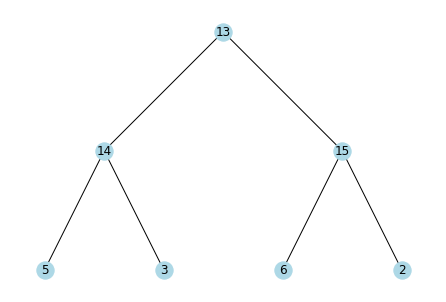

In [6]:
draw_tree(example5)

## Python implementation of the Heapsort

In [7]:
# Implementation of the Heapsort
# The functions used here were derived from the heapsort function on this page: https://www.geeksforgeeks.org/heap-sort/
def heap_sort(inputList): # The function for sorting lists is created here, the inputList is the list to sort
    length = len(inputList)
    
    numCompares = 0
    
    for i in range(length//2 - 1, -1, -1): # The max heap is created
        to_heap(inputList, length, i)
    
    for i in range(length-1, 0, -1): # The heap is reverted back to list form
        inputList[i], inputList[0] = inputList[0], inputList[i]
        to_heap(inputList, i, 0)

def to_heap(inputList, listLength, index): # A subtree is created with the index value being the root
    
    numCompares = 0
    
    root = index
    left = 2 * index + 1
    right = 2 * index + 2
    
     # The root must be larger than either of it's children, or it will be swapped with the larger child
    if left < listLength and inputList[root] < inputList[left]:
         root = left
        
    if right < listLength and inputList[root] < inputList[right]:
        root = right
    
    if root != index: # If the root has been changed and no longer matches, the index, the values stored at the new root and the index are swapped
        inputList[index], inputList[root] = inputList[root], inputList[index] # Values are swapped
        
        numCompares += to_heap(inputList, listLength, root) # The tree is recreated with the the new root
        
    return numCompares

        
testList = []
for i in range(0, 10):
    testList.append(rand.randint(1, 255))
print(testList)

heap_sort(testList)
print(testList)

[113, 157, 244, 249, 121, 121, 251, 221, 157, 82]
[82, 113, 121, 121, 157, 157, 221, 244, 249, 251]
